## Librairies :

In [ ]:
import sys 
sys.path.append('/home/hanane/DAC1/PLDAC/Code') # put path to the folder here

from scipy.spatial import Voronoi, voronoi_plot_2d,ConvexHull
import numpy as np
import matplotlib.pyplot as plt
from tools.data_process import *
from tools.eval import *
from tools.Kmeans_hyperbolic import *
from tools.DCCA import *
from tools.display import *
import pandas as pd
from datetime import datetime as dt
import math
%matplotlib inline 



## Load Data :

In [ ]:

"""
Préparation du dataset   
fichier = open("BS_Locations/Lille_antenna_location.csv",'r')
fichier2 = open("BS_Locations/Lille_antenna_location2.csv",'w')        # On rajoute un tilde à la fin pour éviter d'écraser le fichier source en cas de bug
lignes = fichier.readlines()                # On parcours les lignes du fichier source
for ligne in lignes:
    ligneFinale = ligne.replace(';',', ')            # On remplace tout les espaces par groupe de 4 en tabulation
    fichier2.write(ligneFinale)             # On écrit la nouvelle ligne dans le nouveau fichier
                 
fichier.close()                     # Fermeture du fichier source
fichier2.close()    
"""       
df_geo=pd.read_csv("BS_Locations/Lille_antenna_location2.csv")

df_geo_norm=DCCA.normalize_distance(df_geo) #a que les deux colonnes X et Y sans ID

#Avec les heures 
"""
fichier = open("data/Lille/Lille.csv",'r')
fichier2 = open("data/Lille/Lille_traite.csv",'w')        # On rajoute un tilde à la fin pour éviter d'écraser le fichier source en cas de bug
lignes = fichier.readlines()                # On parcours les lignes du fichier source
for ligne in lignes:
    ligneFinale = ligne.replace(';',', ')            # On remplace tout les espaces par groupe de 4 en tabulation
    fichier2.write(ligneFinale) 
fichier.close()                     # Fermeture du fichier source
fichier2.close()
"""
df_traffic=pd.read_csv("data/Lille/Lille_traite.csv")



## Positions and unique ids

In [3]:
##### les coordonnées sans doublons
coord=[]
id_per_coord={}
for c in range(len(df_geo)):
    x=(df_geo.iloc[c]).iloc[1]
    y=(df_geo.iloc[c]).iloc[2]
    if(not [x,y] in coord):
        coord.append([x,y])
        id_per_coord[(x,y)]=[(df_geo.iloc[c]).iloc[0]]
    else:
        id_per_coord[(x,y)].append((df_geo.iloc[c]).iloc[0])
Nr=len(coord)
print(id_per_coord[(coord[0][0],coord[0][1])])


['0102f81000655dd0', '0102f8100065d1c4', '0102f81000658c0b', '0102f8100065eb38', '8102f8100001484a', '0102f8100065a56e']


## Max & Min traffic

In [4]:
trafic_max=df_traffic[' ByteDn'].max()
trafic_min=df_traffic[' ByteDn'].min()
print("Trafic_max :",trafic_max)
print("Trafic_min :",trafic_min)

Trafic_max : 15828358767.955057
Trafic_min : 0.0


## Week Traffic

In [3]:
loc_lille=pd.read_csv("BS_Locations/Lille_antenna_location2.csv")
loc=pd.read_csv("BS_Locations/Lille_antenna_location2.csv")
del(loc['LocInfo'])
traffic_lille=pd.read_csv("data/Lille/Lille_traite.csv")

In [4]:
a=set(loc_lille['LocInfo'])
b=set(traffic_lille['CellID'])
the_ids=list(set(a) & set(b))

In [5]:
a=[]
for k in range(len(loc_lille)):
    a.append((loc_lille[' Coord_X'][k],loc_lille[' Coord_y'][k]))
print('nombre de rrhs : ',len(set(loc_lille['LocInfo'])),', nombre de positions : ',len(set(a)))

nombre de rrhs :  1394 , nombre de positions :  88


In [7]:
# Python program to Find day of  
# the week for a given date 

time_slot_hour=[['00:00', '00:10', '00:20', '00:30', '00:40', '00:50'],
 ['01:00', '01:10', '01:20', '01:30', '01:40', '01:50'],
 ['02:00', '02:10', '02:20', '02:30', '02:40', '02:50'],
 ['03:00', '03:10', '03:20', '03:30', '03:40', '03:50'],
 ['04:00', '04:10', '04:20', '04:30', '04:40', '04:50'],
 ['05:00', '05:10', '05:20', '05:30', '05:40', '05:50'],
 ['06:00', '06:10', '06:20', '06:30', '06:40', '06:50'],
 ['07:00', '07:10', '07:20', '07:30', '07:40', '07:50'],
 ['08:00', '08:10', '08:20', '08:30', '08:40', '08:50'],
 ['09:00', '09:10', '09:20', '09:30', '09:40', '09:50'],
 ['10:00', '10:10', '10:20', '10:30', '10:40', '10:50'],
 ['11:00', '11:10', '11:20', '11:30', '11:40', '11:50'],
 ['12:00', '12:10', '12:20', '12:30', '12:40', '12:50'],
 ['13:00', '13:10', '13:20', '13:30', '13:40', '13:50'],
 ['14:00', '14:10', '14:20', '14:30', '14:40', '14:50'],
 ['15:00', '15:10', '15:20', '15:30', '15:40', '15:50'],
 ['16:00', '16:10', '16:20', '16:30', '16:40', '16:50'],
 ['17:00', '17:10', '17:20', '17:30', '17:40', '17:50'],
 ['18:00', '18:10', '18:20', '18:30', '18:40', '18:50'],
 ['19:00', '19:10', '19:20', '19:30', '19:40', '19:50'],
 ['20:00', '20:10', '20:20', '20:30', '20:40', '20:50'],
 ['21:00', '21:10', '21:20', '21:30', '21:40', '21:50'],
 ['22:00', '22:10', '22:20', '22:30', '22:40', '22:50'],
 ['23:00', '23:10', '23:20', '23:30', '23:40', '23:50']]

Wednesday


In [8]:
d,mean_week=construct_data_set(traffic_lille,the_ids)

In [12]:
dataFrames_hour,dict_loc_rrhs=get_dataframes(['08:00', '08:10', '08:20', '08:30', '08:40', '08:50'],'Saturday',d,mean_week,loc_lille)

In [13]:
# on somme le traffic par position 
pos_mean_week=get_trafic_per_position(dict_loc_rrhs,time_slot_hour,mean_week)
len(pos_mean_week)


In [15]:
dfs_24H=get_24_dfs('Saturday',pos_mean_week,time_slot_hour)
df_24=get_24_dfs('Saturday',pos_mean_week,time_slot_hour)
df_24_aranged=[]
for df in df_24:
    df_24_aranged.append(df.drop(df.index[77]))
df_24_aranged

[    Coord_X  Coord_Y       Coord_Z
 0    651625  2626995  1.418228e+08
 1    653420  2625730  5.042660e+08
 2    650285  2625320  4.610181e+08
 3    653200  2626680  7.729584e+08
 4    651170  2626500  7.994932e+08
 ..      ...      ...           ...
 73   653717  2627113  2.591046e+08
 74   650935  2627960  7.390216e+07
 75   652300  2627300  2.121171e+05
 76   651510  2627170  1.771539e+08
 78   651304  2627218  6.137551e+06
 
 [78 rows x 3 columns],     Coord_X  Coord_Y       Coord_Z
 0    651625  2626995  7.071898e+07
 1    653420  2625730  4.602042e+08
 2    650285  2625320  3.335501e+08
 3    653200  2626680  5.944429e+08
 4    651170  2626500  7.816532e+08
 ..      ...      ...           ...
 73   653717  2627113  2.436385e+08
 74   650935  2627960  4.280997e+07
 75   652300  2627300  5.640307e+06
 76   651510  2627170  5.041935e+07
 78   651304  2627218  9.146476e+06
 
 [78 rows x 3 columns],     Coord_X  Coord_Y       Coord_Z
 0    651625  2626995  4.577030e+07
 1    653420  

In [16]:
def normalisation(df):
    col=df.columns
    ar={}
    for i in range(len(col)):
        
        colonne= np.array(list(df[col[i]]))
        max_X=max(colonne)
        min_X=min(colonne)
        if((max_X-min_X)!=0):
            max_X=max(colonne)+1
            min_X=min(colonne)-1
            if(col[i]=='Coord_Z'):
                colonne=(colonne-min_X)/(max_X-min_X)
            else:
                colonne=(colonne-min_X)/(max_X-min_X)
        ar[col[i]]=colonne
        
    return pd.DataFrame(ar)

In [17]:
dataFrames_nor=[]
dataFrames=dfs_24H
for dataF in dfs_24H:#df_24_aranged:#
    dataFrames_nor.append(normalisation(dataF))

In [32]:
print(dataFrames_nor[0].iloc[1,0])


0.8472201740156319


## Traffic per Day :

In [5]:
traffic_per_day={}
for t in range(len(df_traffic)):
    day=(df_traffic[' TimeSlot'][t])[1:11]
    if (not day in traffic_per_day.keys()):
        traffic_per_day[day]=df_traffic.loc[df_traffic[' TimeSlot'].str.contains(day)]

In [6]:
for d in traffic_per_day.keys():
    print(d,np.size(traffic_per_day[d]['CellID'].unique()))

2019-03-19 760
2019-03-20 762
2019-03-21 760
2019-03-22 764
2019-03-25 763
2019-03-26 768
2019-03-27 771
2019-03-28 772
2019-03-29 776
2019-03-30 775
2019-04-01 774
2019-04-03 773
2019-04-04 776
2019-04-05 775
2019-04-22 766
2019-04-23 767
2019-04-24 767
2019-04-25 769
2019-04-26 775
2019-04-29 767
2019-04-30 768
2019-03-16 757
2019-03-17 753
2019-05-01 754
2019-05-02 763
2019-05-03 767
2019-05-04 764
2019-05-05 760
2019-05-06 765
2019-05-07 775
2019-05-08 774
2019-05-09 779
2019-05-11 766
2019-05-12 771
2019-05-13 778
2019-05-16 779
2019-05-17 779
2019-05-18 764
2019-05-26 774
2019-05-27 778
2019-05-29 779
2019-06-03 776
2019-06-04 774
2019-06-05 772
2019-06-06 774
2019-06-07 772
2019-06-12 773
2019-06-13 774
2019-06-14 777
2019-06-15 775
2019-03-18 760
2019-03-24 760
2019-04-07 772
2019-04-13 772
2019-04-14 772
2019-04-20 771
2019-04-21 764
2019-04-28 361
2019-04-15 776
2019-04-16 776
2019-04-17 776
2019-04-18 776
2019-04-19 776
2019-03-31 772
2019-04-02 772
2019-04-06 775
2019-05-19

## Declaring variables:

In [53]:
dt=1  #DeltaT = 1heure
Nt=int(24/dt)  #nombre de timespan  par jour
NBBU=2
CBBU=1
To=0.04
max_iter=20
iter_converge=6

## Generating matrix F for 24h:

In [46]:
#F,Fup,r=generate_day_matrix("2019-03-19")
F_norm,r=generate_day_matrix2(dfs_24H,dataFrames_nor,dict_loc_rrhs)

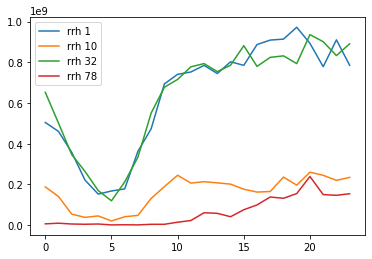

In [47]:
hour=np.arange(0,24)
plt.plot(hour,F[1], label='rrh 1')
plt.plot(hour,F[10], label='rrh 10')
plt.plot(hour,F[32], label='rrh 32')
plt.plot(hour,F[78], label='rrh 78')
plt.legend()
plt.show()

## Application de DCCA :

In [70]:
 
from scipy.spatial import Voronoi, voronoi_plot_2d,ConvexHull
from matplotlib import cm
import matplotlib as mpl
import random
import colorsys
def colors1(n):
    ret = []
    r = int(random.random() * 256)
    g = int(random.random() * 256)
    b = int(random.random() * 256)
    step = 256 / n
    for i in range(n):
        r += step
        g += step
        b += step
        r = int(r) % 256
        g = int(g) % 256
        b = int(b) % 256
        ret.append((r/256,g/265,b/256)) 
    return ret
def colors(N):
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(N)]
    return color



def voronoi_finite_polygons_2d(vor, radius=None):
    """
    Reconstruct infinite voronoi regions in a 2D diagram to finite
    regions.
    Parameters
    ----------
    vor : Voronoi
        Input diagram
    radius : float, optional
        Distance to 'points at infinity'.
    Returns
    -------
    regions : list of tuples
        Indices of vertices in each revised Voronoi regions.
    vertices : list of tuples
        Coordinates for revised Voronoi vertices. Same as coordinates
        of input vertices, with 'points at infinity' appended to the
        end.
    """

    if vor.points.shape[1] != 2:
        raise ValueError("Requires 2D input")

    new_regions = []
    new_vertices = vor.vertices.tolist()

    center = vor.points.mean(axis=0)
    if radius is None:
        radius = vor.points.ptp().max()*2

    # Construct a map containing all ridges for a given point
    all_ridges = {}
    for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        all_ridges.setdefault(p1, []).append((p2, v1, v2))
        all_ridges.setdefault(p2, []).append((p1, v1, v2))
        
    # Reconstruct infinite regions
    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]

        if all(v >= 0 for v in vertices):
            # finite region
            new_regions.append(vertices)
            continue

        # reconstruct a non-finite region
        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]

        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                # finite ridge: already in the region
                continue

            # Compute the missing endpoint of an infinite ridge

            t = vor.points[p2] - vor.points[p1] # tangent
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])  # normal

            midpoint = vor.points[[p1, p2]].mean(axis=0)
            direction = np.sign(np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[v2] + direction * radius

            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())

        # sort region counterclockwise
        vs = np.asarray([new_vertices[v] for v in new_region])
        c = vs.mean(axis=0)
        angles = np.arctan2(vs[:,1] - c[1], vs[:,0] - c[0])
        new_region = np.array(new_region)[np.argsort(angles)]

        # finish
        new_regions.append(new_region.tolist())

    return new_regions, np.asarray(new_vertices)

def affichage_vor(P,coord,col,title,minima,maxima): 
    coordX=[]
    coordY=[]
    for i in range(len(coord)):
        coordX.append(coord[i][0])
        coordY.append(coord[i][1])
    norm = mpl.colors.Normalize(vmin=minima, vmax=maxima, clip=True)
    mapper = cm.ScalarMappable(norm=norm, cmap=cm.twilight_shifted)
    
    vor = Voronoi(coord)
    #fig=voronoi_plot_2d(vor, show_points=True, show_vertices=False, s=1,line_colors='white',line_width=0.5, line_alpha=0.3)
    fig=voronoi_plot_2d(vor, show_points=True, show_vertices=False, s=1)
    regions, vertices = voronoi_finite_polygons_2d(vor)
    r=0
    for region in regions:
        polygon = vertices[region]
        plt.fill(*zip(*polygon), color=mapper.to_rgba(clusters[r]-1)) 
        r+=1
        
    plt.plot(coordX, coordY, 'ko',markersize=1)
    plt.xlim(vor.min_bound[0] - 0.1, vor.max_bound[0] + 0.1)
    plt.ylim(vor.min_bound[1] - 0.1, vor.max_bound[1] + 0.1)
    fig.suptitle(title)
    plt.show()



In [55]:
"""
def affiche_resultat(DataFnorm,les_centres,l_affectation):
    plt.scatter(les_centres['Coord_X'],les_centres['Coord_Y'],color='r',marker='x')
    c=[]
    for l in l_affectation.values():
        X=[]
        for i in l:
            X.append(DataFnorm.loc[i])
        plt.scatter(pd.DataFrame(X)['Coord_X'],pd.DataFrame(X)['Coord_Y'])
        
        
from scipy.spatial import Voronoi, voronoi_plot_2d,ConvexHull
import matplotlib as mpl
from matplotlib import cm
def voronoi_finite_polygons_2d(vor, radius=None):
    """
    Reconstruct infinite voronoi regions in a 2D diagram to finite
    regions.

    Parameters
    ----------
    vor : Voronoi
        Input diagram
    radius : float, optional
        Distance to 'points at infinity'.

    Returns
    -------
    regions : list of tuples
        Indices of vertices in each revised Voronoi regions.
    vertices : list of tuples
        Coordinates for revised Voronoi vertices. Same as coordinates
        of input vertices, with 'points at infinity' appended to the
        end.

    """

    if vor.points.shape[1] != 2:
        raise ValueError("Requires 2D input")

    new_regions = []
    new_vertices = vor.vertices.tolist()

    center = vor.points.mean(axis=0)
    if radius is None:
        radius = vor.points.ptp().max()

    # Construct a map containing all ridges for a given point
    all_ridges = {}
    for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        all_ridges.setdefault(p1, []).append((p2, v1, v2))
        all_ridges.setdefault(p2, []).append((p1, v1, v2))

    # Reconstruct infinite regions
    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]

        if all(v >= 0 for v in vertices):
            # finite region
            new_regions.append(vertices)
            continue

        # reconstruct a non-finite region
        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]

        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                # finite ridge: already in the region
                continue

            # Compute the missing endpoint of an infinite ridge

            t = vor.points[p2] - vor.points[p1] # tangent
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])  # normal

            midpoint = vor.points[[p1, p2]].mean(axis=0)
            direction = np.sign(np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[v2] + direction * radius

            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())

        # sort region counterclockwise
        vs = np.asarray([new_vertices[v] for v in new_region])
        c = vs.mean(axis=0)
        angles = np.arctan2(vs[:,1] - c[1], vs[:,0] - c[0])
        new_region = np.array(new_region)[np.argsort(angles)]

        # finish
        new_regions.append(new_region.tolist())

    return new_regions, np.asarray(new_vertices)
def affichage_vor(DataFnorm,l_affectation,minima,maxima,cap=""):
    speed=[]
    speed_trafic=[]
    cpt=0
    points=[]
    coordX=[]
    coordY=[]
    for l in l_affectation.values():
        X=[]
        for i in l:
            x=DataFnorm.loc[i]['Coord_X']
            y=DataFnorm.loc[i]['Coord_Y']
            speed_trafic.append(DataFnorm.loc[i]['Coord_Z'])
            coordX.append(x)
            coordY.append(y)
            points.append([x,y])
            speed.append(cpt)
        cpt+=1
    
    # make up data points
    points=np.array(points)

    # find min/max values for normalization
    #minima = min(min(y_bd),min(y_bu))
    #maxima = max(np.array(speed_trafic))
   
    # normalize chosen colormap
    norm = mpl.colors.Normalize(vmin=minima, vmax=maxima, clip=True)
    mapper = cm.ScalarMappable(norm=norm, cmap=cm.twilight_shifted)



    # compute Voronoi tesselation
    vor = Voronoi(points)
    fig=voronoi_plot_2d(vor, show_points=True, show_vertices=False, s=1)

    # plot
    regions, vertices = voronoi_finite_polygons_2d(vor)



    # colorize
    r=0
    for region in regions:
        polygon = vertices[region]
        plt.fill(*zip(*polygon), color=mapper.to_rgba(speed[r])) 
        r+=1

    """for r in range(len(vor.point_region)):
        region = vor.regions[vor.point_region[r]]
        #if not -1 in region:
        polygon = [vor.vertices[i] for i in region]
        plt.fill(*zip(*polygon), color=mapper.to_rgba(speed[r])) """

    plt.plot(coordX, coordY, 'ko',markersize=1)
    plt.xlim(vor.min_bound[0] - 0.1, vor.max_bound[0] + 0.1)
    plt.ylim(vor.min_bound[1] - 0.1, vor.max_bound[1] + 0.1)
    #fig.tight_layout(rect=[0, 0, 0.85, 0.95])
    #ax_cb = fig.add_axes([0.85, 0.10, 0.05, 0.8])
    #cb = mpl.colorbar.ColorbarBase(ax_cb, cmap=cm.Blues,norm=norm, orientation='vertical')
    fig.suptitle(cap, fontsize=10)
    plt.show()
    plt.show()
"""

## Tests :

### DCCA avec 24 timespan 

In [51]:
color=colors(60)
general_color=color

13


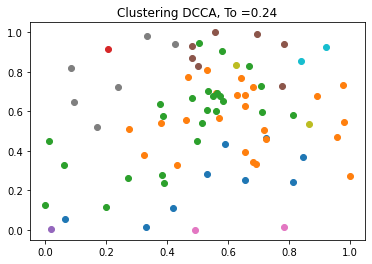

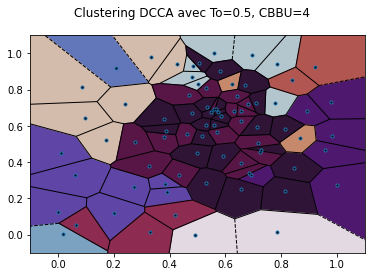

In [71]:
NBBU=2
CBBU=4
To=0.5
#P,l=apply_DCCA(F,r,To,CBBU)

T=DCCA.peak_tracking(CBBU,F_norm,r)  
W=DCCA.matriceComplementarite(r,CBBU,To)
P,l=DCCA.iterative_DCCA (r,F_norm,CBBU,max_iter,To,iter_converge)
coord,clusters,k=display_cluster(P)
print(k)
#color=colors(k)
affichage_vor(clusters,coord,color, "Clustering DCCA avec To=0.5, CBBU=4",0,12)

In [18]:
def gain(P,cbbu):
    maxgain=0
    mingain=100000
    gains=[]
    for c in P:
        if c!=[]:
            agg=DCCA.aggregationTrafic(c)
            g=max(agg)/cbbu
            gains.append(g)
            if (g>maxgain):
                maxgain=g
            if(g<mingain):
                mingain=g
    moygain=np.mean(np.array(gains))
    return maxgain,mingain,moygain
    

In [25]:
print(gain(P,CBBU))

(1.328996691110131, 0.08410964026927144, 0.3808676350246238)


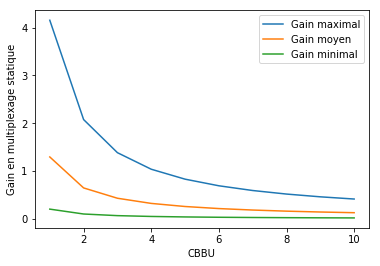

In [21]:
To=0.5
bbus=[]
gmax=[]
gmin=[]
gmoy=[]
for bbu in range(1,11):
    bbus.append(bbu)
    #W=DCCA.matriceComplementarite(r,bbu,To)
    #P,l=DCCA.iterative_DCCA (r,F_norm,bbu,max_iter,To,iter_converge)
    x,n,m=gain(P,bbu)
    gmax.append(x)
    gmin.append(n)
    gmoy.append(m)
plt.plot(bbus,gmax,label="Gain maximal")
plt.plot(bbus,gmoy,label="Gain moyen")
plt.plot(bbus,gmin,label="Gain minimal")
plt.legend()
plt.ylabel("Gain en multiplexage statique")
plt.xlabel("CBBU")
plt.show()

#### Valeur de To:

In [94]:
SMG={}
SMGmax={}
SMGmin={}
SMGmoy={}
surcharge={}
surcharge_moy={}
souscharge={}
souscharge_moy={}
utilite_max={}
utilite_moy={}

57


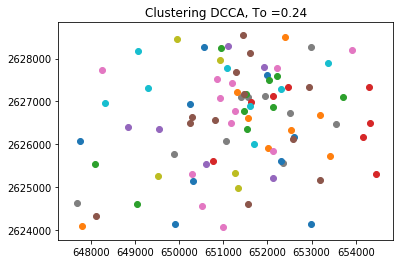

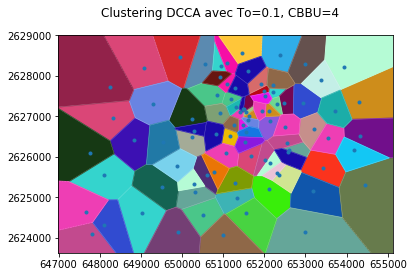

In [95]:
NBBU=2
CBBU=4
To=0.1
#P,l=apply_DCCA(F,r,To,CBBU)

T=DCCA.peak_tracking(CBBU,F_norm,r)  
W=DCCA.matriceComplementarite(r,CBBU,To)
P,l=DCCA.iterative_DCCA (r,F_norm,CBBU,max_iter,To,iter_converge)
coord,clusters,k=display_cluster(P)
print(k)
#color=colors(k)
affichage_vor(clusters,coord,color, "Clustering DCCA avec To=0.1, CBBU=4",0,12)

In [96]:
SMG[To]=(len(clusters)/(k*CBBU))
x,n,y=gain(P,CBBU)
SMGmax[To]=x
SMGmin[To]=n
SMGmoy[To]=y
ecartpos=[]
ecartneg=[]
utilite=[]
for c in P:
    if c!=[]:
        agg=DCCA.aggregationTrafic(c)
        ecart=CBBU-np.max(agg)
        utilite.append(np.max(agg))
        if (ecart >=0):
            ecartpos.append(ecart)
        else:
            ecartneg.append(abs(ecart))
utilite_moy[To]=np.mean(np.array(utilite))            
if(ecartpos != []):
    souscharge[To]=max(ecartpos)
    souscharge_moy[To]=np.mean(np.array(ecartpos))
else:
    souscharge[To]=0
    souscharge_moy[To]=0
if(ecartneg != []):
    surcharge[To]=max(ecartneg)
    surcharge_moy[To]=np.mean(np.array(ecartneg))
    utilite_max[To]=CBBU+max(ecartneg)
else:
    surcharge[To]=0
    surcharge_moy[To]=0
    utilite_max[To]=CBBU-min(ecartpos)

        

32


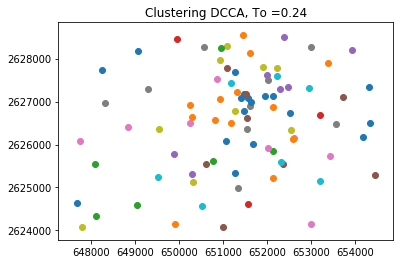

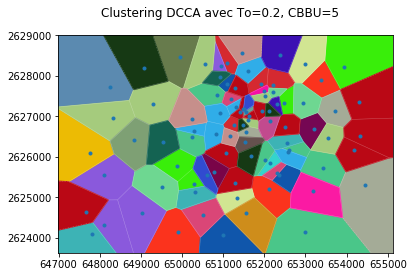

In [97]:
To=0.2
#P,l=apply_DCCA(F,r,To,CBBU)

#T=DCCA.peak_tracking(CBBU,F_norm,r)  
W=DCCA.matriceComplementarite(r,CBBU,To)
P,l=DCCA.iterative_DCCA (r,F_norm,CBBU,max_iter,To,iter_converge)
coord,clusters,k=display_cluster(P)
print(k)
#color=colors(k)
affichage_vor(clusters,coord,color, "Clustering DCCA avec To=0.2, CBBU=5",0,12)

In [98]:
SMG[To]=(len(clusters)/(k*CBBU))
x,n,y=gain(P,CBBU)
SMGmax[To]=x
SMGmin[To]=n
SMGmoy[To]=y
ecartpos=[]
ecartneg=[]
utilite=[]
for c in P:
    if c!=[]:
        agg=DCCA.aggregationTrafic(c)
        ecart=CBBU-np.max(agg)
        utilite.append(np.max(agg))
        if (ecart >=0):
            ecartpos.append(ecart)
        else:
            ecartneg.append(abs(ecart))
utilite_moy[To]=np.mean(np.array(utilite)) 
if(ecartpos != []):
    souscharge[To]=max(ecartpos)
    souscharge_moy[To]=np.mean(np.array(ecartpos))
else:
    souscharge[To]=0
    souscharge_moy[To]=0
if(ecartneg != []):
    surcharge[To]=max(ecartneg)
    surcharge_moy[To]=np.mean(np.array(ecartneg))
    utilite_max[To]=CBBU+max(ecartneg)
else:
    surcharge[To]=0
    surcharge_moy[To]=0
    utilite_max[To]=CBBU-min(ecartpos)

21


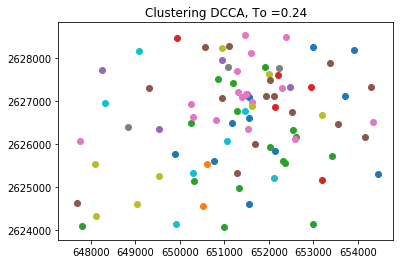

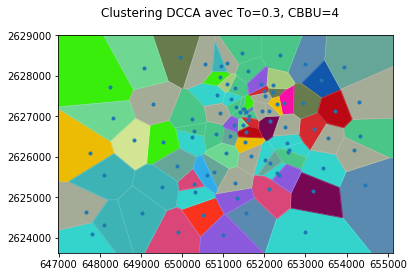

In [99]:
To=0.3
#P,l=apply_DCCA(F,r,To,CBBU)

#T=DCCA.peak_tracking(CBBU,F_norm,r)  
W=DCCA.matriceComplementarite(r,CBBU,To)
P,l=DCCA.iterative_DCCA (r,F_norm,CBBU,max_iter,To,iter_converge)
coord,clusters,k=display_cluster(P)
print(k)
#color=colors(k)
affichage_vor(clusters,coord,color, "Clustering DCCA avec To=0.3, CBBU=4",0,12)

In [100]:
SMG[To]=(len(clusters)/(k*CBBU))
x,n,y=gain(P,CBBU)
SMGmax[To]=x
SMGmin[To]=n
SMGmoy[To]=y
ecartpos=[]
ecartneg=[]
utilite=[]
for c in P:
    if c!=[]:
        agg=DCCA.aggregationTrafic(c)
        ecart=CBBU-np.max(agg)
        utilite.append(np.max(agg))
        if (ecart >=0):
            ecartpos.append(ecart)
        else:
            ecartneg.append(abs(ecart))
utilite_moy[To]=np.mean(np.array(utilite)) 
if(ecartpos != []):
    souscharge[To]=max(ecartpos)
    souscharge_moy[To]=np.mean(np.array(ecartpos))
else:
    souscharge[To]=0
    souscharge_moy[To]=0
if(ecartneg != []):
    surcharge_moy[To]=np.mean(np.array(ecartneg))
    surcharge[To]=max(ecartneg)
    utilite_max[To]=CBBU+max(ecartneg)
else:
    surcharge_moy[To]=0
    surcharge[To]=0
    utilite_max[To]=CBBU-min(ecartpos)


15


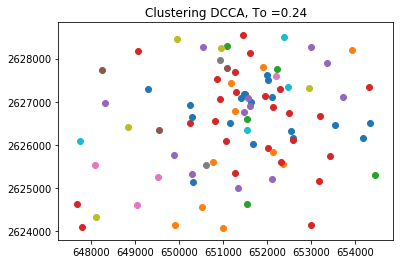

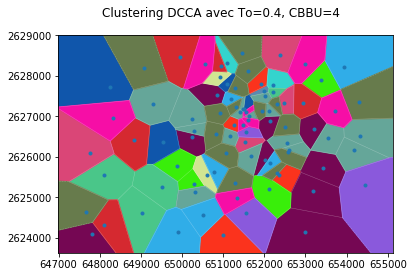

In [101]:
To=0.4
#P,l=apply_DCCA(F,r,To,CBBU)

#T=DCCA.peak_tracking(CBBU,F_norm,r)  
W=DCCA.matriceComplementarite(r,CBBU,To)
P,l=DCCA.iterative_DCCA (r,F_norm,CBBU,max_iter,To,iter_converge)
coord,clusters,k=display_cluster(P)
print(k)
#color=colors(k)
affichage_vor(clusters,coord,color, "Clustering DCCA avec To=0.4, CBBU=4",0,12)

In [102]:
SMG[To]=(len(clusters)/(k*CBBU))
x,n,y=gain(P,CBBU)
SMGmax[To]=x
SMGmin[To]=n
SMGmoy[To]=y
ecartpos=[]
ecartneg=[]
utilite=[]
for c in P:
    if c!=[]:
        agg=DCCA.aggregationTrafic(c)
        ecart=CBBU-np.max(agg)
        utilite.append(np.max(agg))
        if (ecart >=0):
            ecartpos.append(ecart)
        else:
            ecartneg.append(abs(ecart))
utilite_moy[To]=np.mean(np.array(utilite)) 
if(ecartpos != []):
    souscharge[To]=max(ecartpos)
    souscharge_moy[To]=np.mean(np.array(ecartpos))
else:
    souscharge_moy[To]=0
    souscharge[To]=0
if(ecartneg != []):
    surcharge_moy[To]=np.mean(np.array(ecartneg))
    surcharge[To]=max(ecartneg)
    utilite_max[To]=CBBU+max(ecartneg)
else:
    surcharge_moy[To]=0
    surcharge[To]=0
    utilite_max[To]=CBBU-min(ecartpos)

13


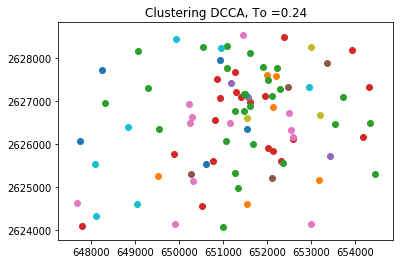

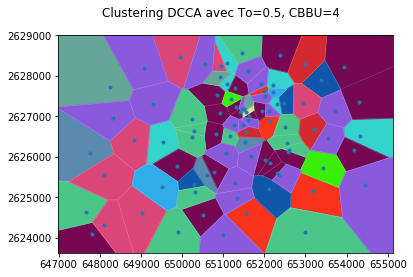

In [103]:
To=0.5
#P,l=apply_DCCA(F,r,To,CBBU)

#T=DCCA.peak_tracking(CBBU,F_norm,r)  
W=DCCA.matriceComplementarite(r,CBBU,To)
P,l=DCCA.iterative_DCCA (r,F_norm,CBBU,max_iter,To,iter_converge)
coord,clusters,k=display_cluster(P)
print(k)
#color=colors(k)
affichage_vor(clusters,coord,color, "Clustering DCCA avec To=0.5, CBBU=4",0,12)

In [104]:
SMG[To]=(len(clusters)/(k*CBBU))
x,n,y=gain(P,CBBU)
SMGmax[To]=x
SMGmin[To]=n
SMGmoy[To]=y
ecartpos=[]
ecartneg=[]
utilite=[]
for c in P:
    if c!=[]:
        agg=DCCA.aggregationTrafic(c)
        ecart=CBBU-np.max(agg)
        utilite.append(np.max(agg))
        if (ecart >=0):
            ecartpos.append(ecart)
        else:
            ecartneg.append(abs(ecart))
utilite_moy[To]=np.mean(np.array(utilite)) 
if(ecartpos != []):
    souscharge[To]=max(ecartpos)
    souscharge_moy[To]=np.mean(np.array(ecartpos))
else:
    souscharge[To]=0
    souscharge_moy[To]=0
if(ecartneg != []):
    surcharge_moy[To]=np.mean(np.array(ecartneg))
    surcharge[To]=max(ecartneg)
    utilite_max[To]=CBBU+max(ecartneg)
else:
    surcharge_moy[To]=0
    surcharge[To]=0
    utilite_max[To]=CBBU-min(ecartpos)

10


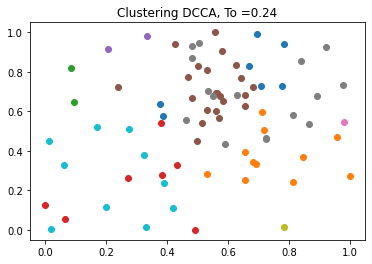

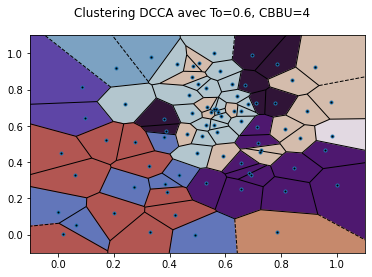

In [72]:
To=0.6
#P,l=apply_DCCA(F,r,To,CBBU)

#T=DCCA.peak_tracking(CBBU,F_norm,r)  
#W=DCCA.matriceComplementarite(r,CBBU,To)
P,l=DCCA.iterative_DCCA (r,F_norm,CBBU,max_iter,To,iter_converge)
coord,clusters,k=display_cluster(P)
print(k)
#color=colors(k)
affichage_vor(clusters,coord,color, "Clustering DCCA avec To=0.6, CBBU=4",0,12)

In [106]:
SMG[To]=(len(clusters)/(k*CBBU))
x,n,y=gain(P,CBBU)
SMGmax[To]=x
SMGmin[To]=n
SMGmoy[To]=y
ecartpos=[]
ecartneg=[]
utilite=[]
for c in P:
    if c!=[]:
        agg=DCCA.aggregationTrafic(c)
        ecart=CBBU-np.max(agg)
        utilite.append(np.max(agg))
        if (ecart >=0):
            ecartpos.append(ecart)
        else:
            ecartneg.append(abs(ecart))
utilite_moy[To]=np.mean(np.array(utilite)) 
if(ecartpos != []):
    souscharge_moy[To]=np.mean(np.array(ecartpos))
    souscharge[To]=max(ecartpos)
else:
    souscharge_moy[To]=0
    souscharge[To]=0
if(ecartneg != []):
    surcharge_moy[To]=np.mean(np.array(ecartneg))
    surcharge[To]=max(ecartneg)
    utilite_max[To]=CBBU+max(ecartneg)
else:
    surcharge_moy[To]=0
    surcharge[To]=0
    utilite_max[To]=CBBU-min(ecartpos)

8


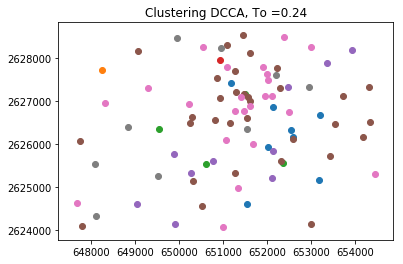

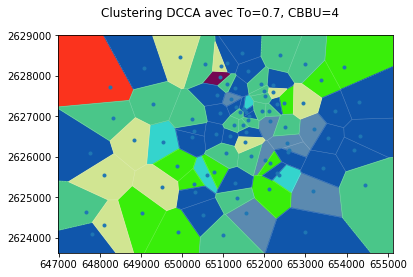

In [107]:
To=0.7
#P,l=apply_DCCA(F,r,To,CBBU)

#T=DCCA.peak_tracking(CBBU,F_norm,r)  
#W=DCCA.matriceComplementarite(r,CBBU,To)
P,l=DCCA.iterative_DCCA (r,F_norm,CBBU,max_iter,To,iter_converge)
coord,clusters,k=display_cluster(P)
print(k)
#color=colors(k)
affichage_vor(clusters,coord,color, "Clustering DCCA avec To=0.7, CBBU=4",0,12)

In [108]:
SMG[To]=(len(clusters)/(k*CBBU))
x,n,y=gain(P,CBBU)
SMGmax[To]=x
SMGmin[To]=n
SMGmoy[To]=y
ecartpos=[]
ecartneg=[]
utilite=[]
for c in P:
    if c!=[]:
        agg=DCCA.aggregationTrafic(c)
        ecart=CBBU-np.max(agg)
        utilite.append(np.max(agg))
        if (ecart >=0):
            ecartpos.append(ecart)
        else:
            ecartneg.append(abs(ecart))
utilite_moy[To]=np.mean(np.array(utilite)) 
if(ecartpos != []):
    souscharge_moy[To]=np.mean(np.array(ecartpos))
    souscharge[To]=max(ecartpos)
else:
    souscharge_moy[To]=0
    souscharge[To]=0
if(ecartneg != []):
    surcharge_moy[To]=np.mean(np.array(ecartneg))
    surcharge[To]=max(ecartneg)
    utilite_max[To]=CBBU+max(ecartneg)
else:
    surcharge_moy[To]=0
    surcharge[To]=0
    utilite_max[To]=CBBU-min(ecartpos)



8


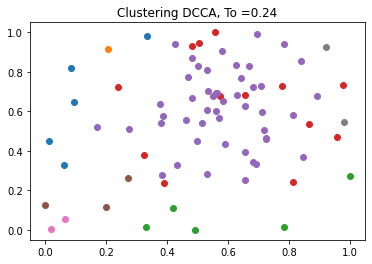

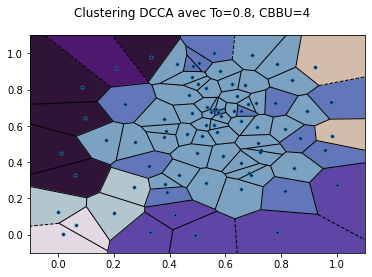

In [74]:
To=0.8
#P,l=apply_DCCA(F,r,To,CBBU)

#T=DCCA.peak_tracking(CBBU,F_norm,r)  
#W=DCCA.matriceComplementarite(r,CBBU,To)
P,l=DCCA.iterative_DCCA (r,F_norm,CBBU,max_iter,To,iter_converge)
coord,clusters,k=display_cluster(P)
print(k)
#color=colors(k)
affichage_vor(clusters,coord,color, "Clustering DCCA avec To=0.8, CBBU=4",0,12)

In [110]:
SMG[To]=(len(clusters)/(k*CBBU))
x,n,y=gain(P,CBBU)
SMGmax[To]=x
SMGmin[To]=n
SMGmoy[To]=y
ecartpos=[]
ecartneg=[]
utilite=[]
for c in P:
    if c!=[]:
        agg=DCCA.aggregationTrafic(c)
        ecart=CBBU-np.max(agg)
        utilite.append(np.max(agg))
        if (ecart >=0):
            ecartpos.append(ecart)
        else:
            ecartneg.append(abs(ecart))
utilite_moy[To]=np.mean(np.array(utilite)) 
if(ecartpos != []):
    souscharge_moy[To]=np.mean(np.array(ecartpos))
    souscharge[To]=max(ecartpos)
else:
    souscharge_moy[To]=0
    souscharge[To]=0
if(ecartneg != []):
    surcharge_moy[To]=np.mean(np.array(ecartneg))
    surcharge[To]=max(ecartneg)
    utilite_max[To]=CBBU+max(ecartneg)
else:
    surcharge_moy[To]=0
    surcharge[To]=0
    utilite_max[To]=CBBU-min(ecartpos)



6


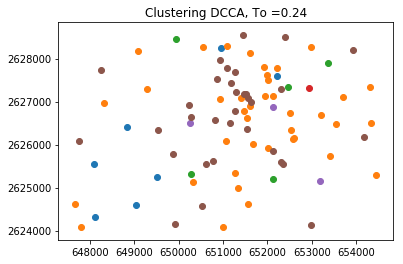

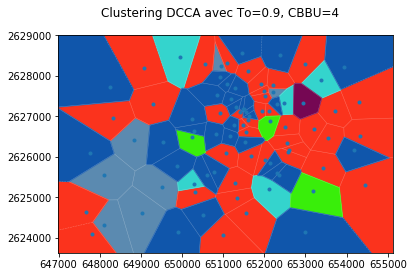

In [111]:
To=0.9
#P,l=apply_DCCA(F,r,To,CBBU)

#T=DCCA.peak_tracking(CBBU,F_norm,r)  
#W=DCCA.matriceComplementarite(r,CBBU,To)
P,l=DCCA.iterative_DCCA (r,F_norm,CBBU,max_iter,To,iter_converge)
coord,clusters,k=display_cluster(P)
print(k)
#color=colors(k)
affichage_vor(clusters,coord,color, "Clustering DCCA avec To=0.9, CBBU=4")

In [112]:
SMG[To]=(len(clusters)/(k*CBBU))
x,n,y=gain(P,CBBU)
SMGmax[To]=x
SMGmin[To]=n
SMGmoy[To]=y
ecartpos=[]
ecartneg=[]
utilite=[]
for c in P:
    if c!=[]:
        agg=DCCA.aggregationTrafic(c)
        ecart=CBBU-np.max(agg)
        utilite.append(np.max(agg))
        if (ecart >=0):
            ecartpos.append(ecart)
        else:
            ecartneg.append(abs(ecart))
utilite_moy[To]=np.mean(np.array(utilite)) 
if(ecartpos != []):
    souscharge_moy[To]=np.mean(np.array(ecartpos))
    souscharge[To]=max(ecartpos)
else:
    souscharge_moy[To]=0
    souscharge[To]=0
if(ecartneg != []):
    surcharge_moy[To]=np.mean(np.array(ecartneg))
    surcharge[To]=max(ecartneg)
    utilite_max[To]=CBBU+max(ecartneg)
else:
    surcharge_moy[To]=0
    surcharge[To]=0
    utilite_max[To]=CBBU-min(ecartpos)



5


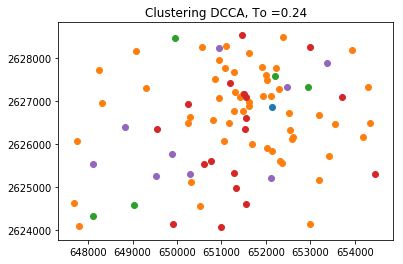

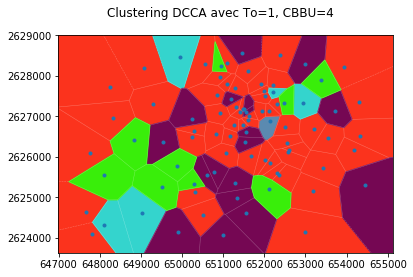

In [113]:
To=1
#P,l=apply_DCCA(F,r,To,CBBU)

#T=DCCA.peak_tracking(CBBU,F_norm,r)  
#W=DCCA.matriceComplementarite(r,CBBU,To)
P,l=DCCA.iterative_DCCA (r,F_norm,CBBU,max_iter,To,iter_converge)
coord,clusters,k=display_cluster(P)
print(k)
#color=colors(k)
affichage_vor(clusters,coord,color, "Clustering DCCA avec To=1, CBBU=4")

In [114]:
SMG[To]=(len(clusters)/(k*CBBU))
x,n,y=gain(P,CBBU)
SMGmax[To]=x
SMGmin[To]=n
SMGmoy[To]=y
ecartpos=[]
ecartneg=[]
utilite=[]
for c in P:
    if c!=[]:
        agg=DCCA.aggregationTrafic(c)
        ecart=CBBU-np.max(agg)
        utilite.append(np.max(agg))
        if (ecart >=0):
            ecartpos.append(ecart)
        else:
            ecartneg.append(abs(ecart))
utilite_moy[To]=np.mean(np.array(utilite)) 
if(ecartpos != []):
    souscharge_moy[To]=np.mean(np.array(ecartpos))
    souscharge[To]=max(ecartpos)
else:
    souscharge_moy[To]=0
    souscharge[To]=0
if(ecartneg != []):
    surcharge_moy[To]=np.mean(np.array(ecartneg))
    surcharge[To]=max(ecartneg)
    utilite_max[To]=CBBU+max(ecartneg)
else:
    surcharge_moy[To]=0
    surcharge[To]=0
    utilite_max[To]=CBBU-min(ecartpos)

print(SMG,surcharge,souscharge)

{0.1: 0.38596491228070173, 0.2: 0.6875, 0.3: 1.0476190476190477, 0.4: 1.4666666666666666, 0.5: 1.6923076923076923, 0.6: 2.2, 0.7: 2.75, 0.8: 3.142857142857143, 0.9: 3.6666666666666665, 1: 4.4} {0.1: 0, 0.2: 0, 0.3: 0, 0.4: 0, 0.5: 0, 0.6: 0.7621129148521808, 0.7: 2.76197540295337, 0.8: 3.1343263751570287, 0.9: 3.108123941319402, 1: 7.299966294373855} {0.1: 4.0, 0.2: 4.0, 0.3: 3.8034424688128583, 0.4: 4.0, 0.5: 3.862214667169674, 0.6: 3.560672887856688, 0.7: 3.9065138079009696, 0.8: 3.920380998275803, 0.9: 3.7397819148964384, 1: 3.5420830076357013}


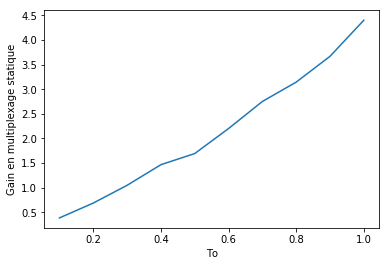

In [115]:
plt.plot(SMG.keys(),SMG.values())
plt.ylabel("Gain en multiplexage statique")
plt.xlabel("To")
plt.show()

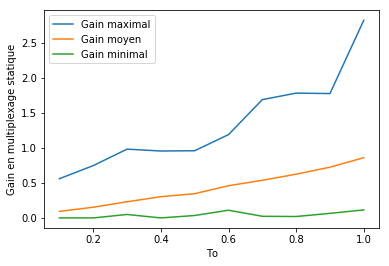

In [116]:
x,n,y=gain(P,CBBU)
plt.plot(SMGmax.keys(),SMGmax.values(),label="Gain maximal")
plt.plot(SMGmoy.keys(),SMGmoy.values(),label="Gain moyen")
plt.plot(SMGmin.keys(),SMGmin.values(),label="Gain minimal")
plt.legend()
plt.ylabel("Gain en multiplexage statique")
plt.xlabel("To")
plt.show()

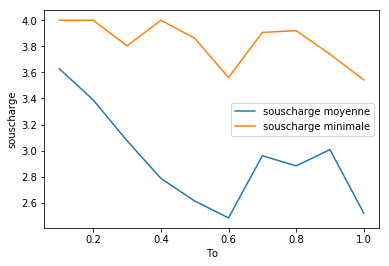

In [117]:
plt.plot(souscharge_moy.keys(),souscharge_moy.values(),label="souscharge moyenne")
plt.plot(souscharge.keys(),souscharge.values(),label="souscharge minimale")
plt.ylabel("souscharge")
plt.xlabel("To")
plt.legend()
plt.show()

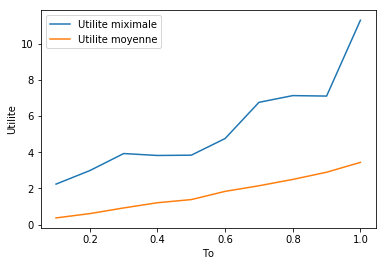

In [120]:
plt.plot(utilite_max.keys(),utilite_max.values(),label="Utilite miximale")
plt.plot(utilite_moy.keys(),utilite_moy.values(),label="Utilite moyenne")
plt.legend()
plt.ylabel("Utilite")
plt.xlabel("To")
plt.show()

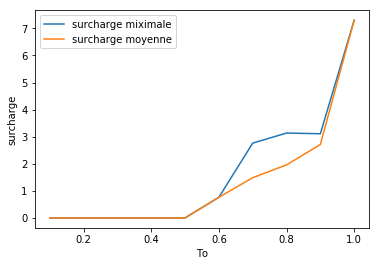

In [119]:
plt.plot(surcharge.keys(),surcharge.values(),label="surcharge miximale")
plt.plot(surcharge_moy.keys(),surcharge_moy.values(),label="surcharge moyenne")
plt.ylabel("surcharge")
plt.xlabel("To")
plt.legend()
plt.show()

#### Valeurs de Capacité de la BBU :

In [42]:
def evaluate_CBBU (P,CBBU):
    ecart=[]
    for C in P:
        if (C!=[]):
            traf_arg=DCCA.aggregationTrafic(C)
            ecart.append(CBBU-max(traf_arg))
    return ecart

In [43]:
To=0.4
lesmax=[]
lesmin=[]
for i in range(1,10):
    CBBU=i
    T=DCCA.peak_tracking(CBBU,F_norm,r)  
    W=DCCA.matriceComplementarite(r,CBBU,To)
    P,l=DCCA.iterative_DCCA (r,F_norm,CBBU,max_iter,To,iter_converge)
    e=evaluate_CBBU(P,CBBU)
    lesmax.append(max(e))
    lesmin.append(min(e))

[-3.77414398694678, -2.475367265449889, -1.520707962002609, -1.441988406904736, 0.362085747160358, 0.8470517839737726, 2.221386875159193, 2.399053040123423, 4.125950586873012]


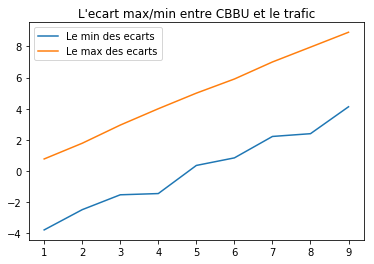

In [44]:
print(lesmin)
x=list(np.arange(1,10))
plt.title("L'ecart max/min entre CBBU et le trafic")
plt.plot(x, lesmin, label="Le min des ecarts ")
plt.plot(x, lesmax, label="Le max des ecarts")
plt.legend()
plt.show()

## Clustering Par Tranche :

## Jour de semaine:

In [286]:
#F,Fup,r=generate_day_matrix("2019-05-21")

In [107]:
F_wd,Fup_wd,r_wd=generate_day_matrix("2019-05-19")

In [108]:
trafic_max1=max(np.max(F),np.max(F_wd))*0.75
trafic_min1=min(np.min(F),np.min(F_wd))*0.75
print(trafic_max1,trafic_min1)
print((np.max(F),np.max(F_wd)))

3261172247.425289 0.0
(4348229663.233719, 1648823168.9081848)


In [109]:
F_norm=DCCA.normalize_trafic(F,trafic_max1,trafic_min1)


### 1. Création de Timespans

In [110]:
F1=F_norm[:,0:8]
F2=F_norm[:,8:12]
F3=F_norm[:,12:16]
F4=F_norm[:,16:23]
print(np.shape(F1))

(88, 8)


### 2. Choix de CBBU

In [111]:
To=0.4
lesmax=[]
lesmin=[]
for i in range(1,11):
    CBBU=i
    T=DCCA.peak_tracking(CBBU,F_norm,r)  
    W=DCCA.matriceComplementarite(r,CBBU,To)
    P,l=DCCA.iterative_DCCA (r,F_norm,CBBU,max_iter,To,iter_converge)
    e=evaluate_CBBU(P,CBBU)
    lesmax.append(max(e))
    lesmin.append(min(e))


[-3.7314580615354, -3.8041468317603115, -2.080993018881162, -0.022141085439107755, 0.15850750215006038, 1.010717135915045, 2.8716660777329013, 2.6767463572300203, 3.7002203021784936, 5.7465265292873955]


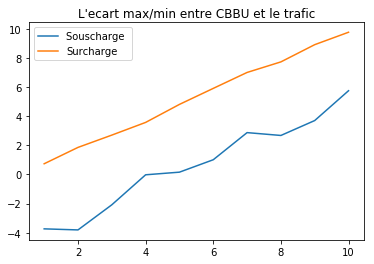

In [112]:
print(lesmin)
x=list(np.arange(1,11))
plt.title("L'ecart max/min entre CBBU et le trafic")
plt.plot(x, lesmin, label="Souscharge ")
plt.plot(x, lesmax, label="Surcharge")
plt.legend()
plt.show()

Le min des écarts n'evoule pas en monotonie car on exécute DCCA à chaque fois qui génère des clusters différents à chaque exécution et donc le trafic aggregé diffère.

### 3. Clustering

In [142]:
SMG_semaine={}
surcharge_semaine={}
souscharge_semaine={}
utilite_max_semaine={}

15


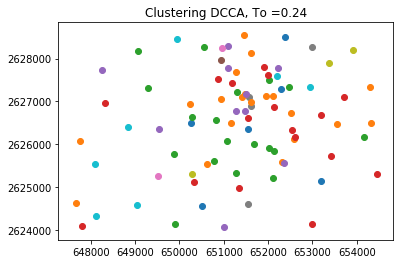

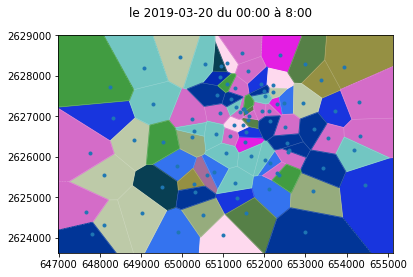

In [143]:
To=0.4
CBBU=5
#P,l=apply_DCCA(F,r,To,CBBU)
for i in range(len(r)):
        r[i].setTrafic(F1[i])

T=DCCA.peak_tracking(CBBU,F1,r)  
W=DCCA.matriceComplementarite(r,CBBU,To)
P,l=DCCA.iterative_DCCA (r,F1,CBBU,max_iter,To,iter_converge)
coord,clusters,k=display_cluster(P)
print(k)
affichage_vor(clusters,coord,color, "le 2019-03-20 du 00:00 à 8:00")

In [144]:
h="00:00"
SMG_semaine[h]=(len(clusters)/(k*CBBU))
ecartpos=[]
ecartneg=[]
for c in P:
    if c!=[]:
        agg=DCCA.aggregationTrafic(c)
        ecart=CBBU-np.max(agg)
        if (ecart >=0):
            ecartpos.append(ecart)
        else:
            ecartneg.append(abs(ecart))
if(ecartpos != []):
    souscharge_semaine[h]=max(ecartpos)
    
else:
    souscharge_semaine[h]=0
if(ecartneg != []):
    surcharge_semaine[h]=max(ecartneg)
    utilite_max_semaine[h]=CBBU+max(ecartneg)
else:
    surcharge_semaine[h]=0
    utilite_max_semaine[h]=CBBU-min(ecartpos)

17


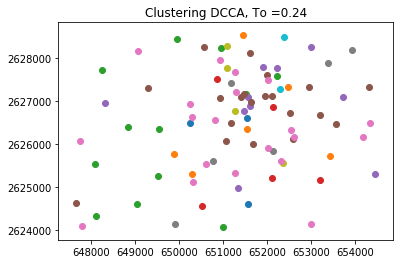

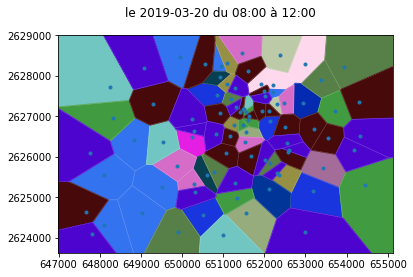

In [145]:
for i in range(len(r)):
    r[i].setTrafic(F2[i])

T=DCCA.peak_tracking(CBBU,F2,r)  
W=DCCA.matriceComplementarite(r,CBBU,To)
P,l=DCCA.iterative_DCCA (r,F2,CBBU,max_iter,To,iter_converge)
coord,clusters,k=display_cluster(P)
print(k)
affichage_vor(clusters,coord,color, "le 2019-03-20 du 08:00 à 12:00")

In [146]:
h="08:00"
SMG_semaine[h]=(len(clusters)/(k*CBBU))
ecartpos=[]
ecartneg=[]
for c in P:
    if c!=[]:
        agg=DCCA.aggregationTrafic(c)
        ecart=CBBU-np.max(agg)
        if (ecart >=0):
            ecartpos.append(ecart)
        else:
            ecartneg.append(abs(ecart))
if(ecartpos != []):
    souscharge_semaine[h]=max(ecartpos)
    
else:
    souscharge_semaine[h]=0
if(ecartneg != []):
    surcharge_semaine[h]=max(ecartneg)
    utilite_max_semaine[h]=CBBU+max(ecartneg)
else:
    surcharge_semaine[h]=0
    utilite_max_semaine[h]=CBBU-min(ecartpos)

13


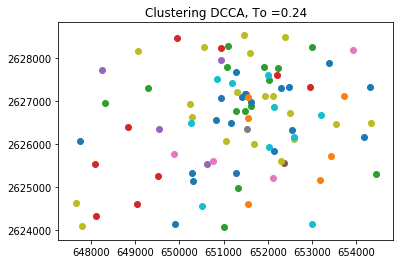

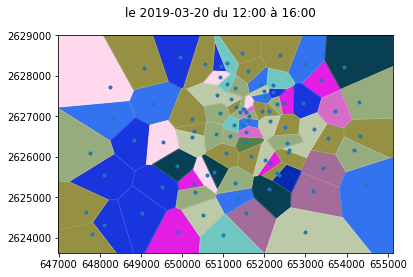

In [147]:
for i in range(len(r)):
    r[i].setTrafic(F3[i])

T=DCCA.peak_tracking(CBBU,F3,r)  
W=DCCA.matriceComplementarite(r,CBBU,To)
P,l=DCCA.iterative_DCCA (r,F3,CBBU,max_iter,To,iter_converge)
coord,clusters,k=display_cluster(P)
print(k)
affichage_vor(clusters,coord,color, "le 2019-03-20 du 12:00 à 16:00")

In [148]:
h="12:00"
SMG_semaine[h]=(len(clusters)/(k*CBBU))
ecartpos=[]
ecartneg=[]
for c in P:
    if c!=[]:
        agg=DCCA.aggregationTrafic(c)
        ecart=CBBU-np.max(agg)
        if (ecart >=0):
            ecartpos.append(ecart)
        else:
            ecartneg.append(abs(ecart))
if(ecartpos != []):
    souscharge_semaine[h]=max(ecartpos)
    
else:
    souscharge_semaine[h]=0
if(ecartneg != []):
    surcharge_semaine[h]=max(ecartneg)
    utilite_max_semaine[h]=CBBU+max(ecartneg)
else:
    surcharge_semaine[h]=0
    utilite_max_semaine[h]=CBBU-min(ecartpos)

15


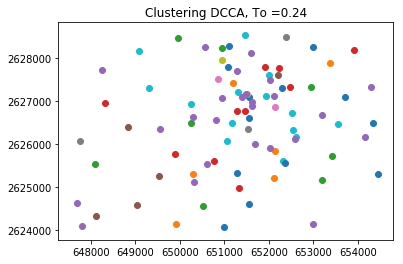

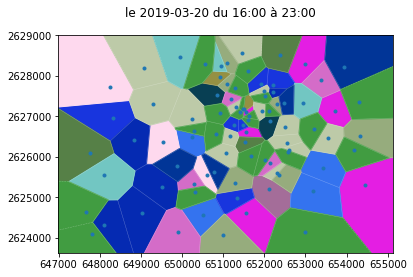

In [149]:
for i in range(len(r)):
    r[i].setTrafic(F4[i])

T=DCCA.peak_tracking(CBBU,F4,r)  
W=DCCA.matriceComplementarite(r,CBBU,To)
P,l=DCCA.iterative_DCCA (r,F4,CBBU,max_iter,To,iter_converge)
coord,clusters,k=display_cluster(P)
print(k)
affichage_vor(clusters,coord,color, "le 2019-03-20 du 16:00 à 23:00")

In [150]:
h="16:00"
SMG_semaine[h]=(len(clusters)/(k*CBBU))
ecartpos=[]
ecartneg=[]
for c in P:
    if c!=[]:
        agg=DCCA.aggregationTrafic(c)
        ecart=CBBU-np.max(agg)
        if (ecart >=0):
            ecartpos.append(ecart)
        else:
            ecartneg.append(abs(ecart))
if(ecartpos != []):
    souscharge_semaine[h]=max(ecartpos)
    
else:
    souscharge_semaine[h]=0
if(ecartneg != []):
    surcharge_semaine[h]=max(ecartneg)
    utilite_max_semaine[h]=CBBU+max(ecartneg)
else:
    surcharge_semaine[h]=0
    utilite_max_semaine[h]=CBBU-min(ecartpos)

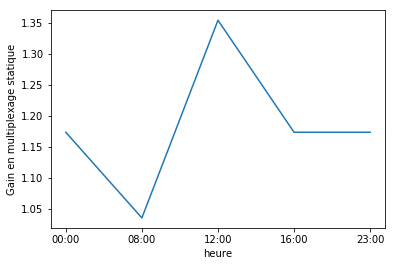

In [151]:
x=list(SMG_semaine.keys())+["23:00"]
y=list(SMG_semaine.values())+[SMG_semaine["00:00"]]
plt.plot(x,y)
plt.ylabel("Gain en multiplexage statique")
plt.xlabel("heure")
plt.show()

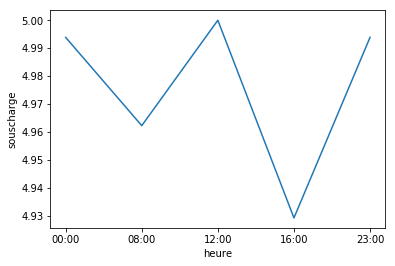

In [152]:
plt.plot(list(souscharge_semaine.keys())+["23:00"],list(souscharge_semaine.values())+[souscharge_semaine["00:00"]])
plt.ylabel("souscharge")
plt.xlabel("heure")
plt.show()

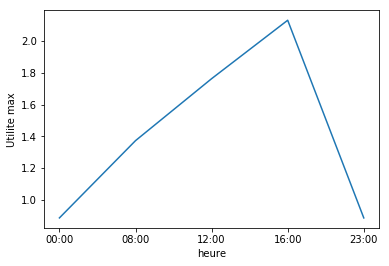

In [153]:
plt.plot(list(utilite_max_semaine.keys())+["23:00"],list(utilite_max_semaine.values())+[utilite_max_semaine["00:00"]])
plt.ylabel("Utilite max")
plt.xlabel("heure")
plt.show()

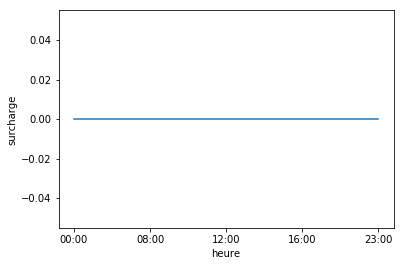

In [154]:
plt.plot(list(surcharge_semaine.keys())+["23:00"],list(surcharge_semaine.values())+[surcharge_semaine["00:00"]])
plt.ylabel("surcharge")
plt.xlabel("heure")
plt.show()

## Weekend

In [126]:
#F,Fup,r=generate_day_matrix("2019-03-31")
F_norm=DCCA.normalize_trafic(F_wd,trafic_max1,trafic_min1)
"""
for i in range(len(r_wd)):
        r_wd[i].setTrafic(F_norm[i])
"""

'\nfor i in range(len(r_wd)):\n        r_wd[i].setTrafic(F_norm[i])\n'

In [127]:
F1=F_norm[:,0:8]
F2=F_norm[:,8:12]
F3=F_norm[:,12:16]
F4=F_norm[:,16:23]
print(np.shape(F1))

(88, 8)


In [128]:
SMG_weekend={}
surcharge_weekend={}
souscharge_weekend={}
utilite_max_weekend={}

16


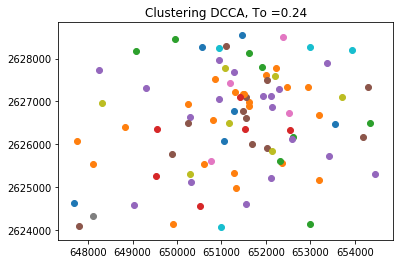

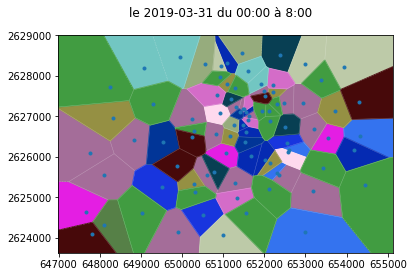

In [129]:
CBBU=4
To=0.4
#P,l=apply_DCCA(F,r,To,CBBU)
for i in range(len(r_wd)):
    r_wd[i].setTrafic(F1[i])
T=DCCA.peak_tracking(CBBU,F1,r_wd)  
W=DCCA.matriceComplementarite(r_wd,CBBU,To)
P,l=DCCA.iterative_DCCA (r_wd,F1,CBBU,max_iter,To,iter_converge)
coord,clusters,k=display_cluster(P)
print(k)
affichage_vor(clusters,coord,color, "le 2019-03-31 du 00:00 à 8:00")

In [130]:
h="00:00"
SMG_weekend[h]=(len(clusters)/(k*CBBU))
ecartpos=[]
ecartneg=[]
for c in P:
    if c!=[]:
        agg=DCCA.aggregationTrafic(c)
        ecart=CBBU-np.max(agg)
        if (ecart >=0):
            ecartpos.append(ecart)
        else:
            ecartneg.append(abs(ecart))
if(ecartpos != []):
    souscharge_weekend[h]=max(ecartpos)
    
else:
    souscharge_weekend[h]=0
if(ecartneg != []):
    surcharge_weekend[h]=max(ecartneg)
    utilite_max_weekend[h]=CBBU+max(ecartneg)
else:
    surcharge_weekend[h]=0
    utilite_max_weekend[h]=CBBU-min(ecartpos)

15


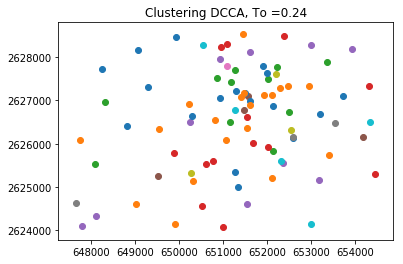

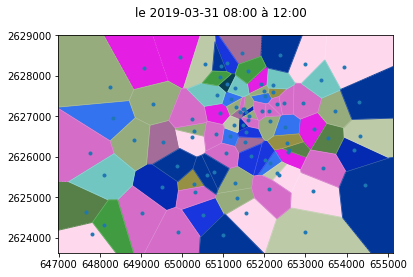

In [131]:
for i in range(len(r_wd)):
    r_wd[i].setTrafic(F2[i])
T=DCCA.peak_tracking(CBBU,F2,r_wd)  
W=DCCA.matriceComplementarite(r_wd,CBBU,To)
P,l=DCCA.iterative_DCCA (r_wd,F2,CBBU,max_iter,To,iter_converge)
coord,clusters,k=display_cluster(P)
print(k)
affichage_vor(clusters,coord,color, "le 2019-03-31 08:00 à 12:00")

In [132]:
h="08:00"
SMG_weekend[h]=(len(clusters)/(k*CBBU))
ecartpos=[]
ecartneg=[]
for c in P:
    if c!=[]:
        agg=DCCA.aggregationTrafic(c)
        ecart=CBBU-np.max(agg)
        if (ecart >=0):
            ecartpos.append(ecart)
        else:
            ecartneg.append(abs(ecart))
if(ecartpos != []):
    souscharge_weekend[h]=max(ecartpos)
    
else:
    souscharge_weekend[h]=0
if(ecartneg != []):
    surcharge_weekend[h]=max(ecartneg)
    utilite_max_weekend[h]=CBBU+max(ecartneg)
else:
    surcharge_weekend[h]=0
    utilite_max_weekend[h]=CBBU-min(ecartpos)

14


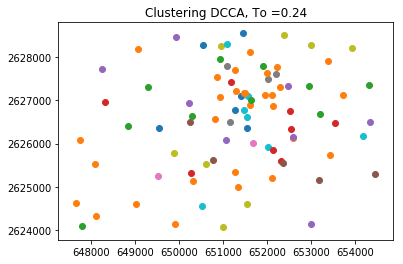

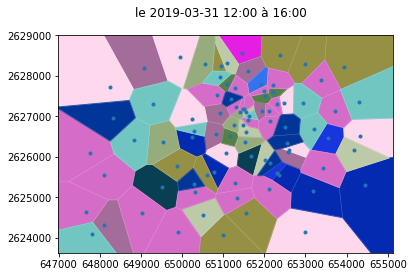

In [133]:
for i in range(len(r_wd)):
    r_wd[i].setTrafic(F3[i])
T=DCCA.peak_tracking(CBBU,F3,r_wd)  
W=DCCA.matriceComplementarite(r_wd,CBBU,To)
P,l=DCCA.iterative_DCCA (r_wd,F3,CBBU,max_iter,To,iter_converge)
coord,clusters,k=display_cluster(P)
print(k)
affichage_vor(clusters,coord,color, "le 2019-03-31 12:00 à 16:00")

In [134]:
h="12:00"
SMG_weekend[h]=(len(clusters)/(k*CBBU))
ecartpos=[]
ecartneg=[]
for c in P:
    if c!=[]:
        agg=DCCA.aggregationTrafic(c)
        ecart=CBBU-np.max(agg)
        if (ecart >=0):
            ecartpos.append(ecart)
        else:
            ecartneg.append(abs(ecart))
if(ecartpos != []):
    souscharge_weekend[h]=max(ecartpos)
    
else:
    souscharge_weekend[h]=0
if(ecartneg != []):
    surcharge_weekend[h]=max(ecartneg)
    utilite_max_weekend[h]=CBBU+max(ecartneg)
else:
    surcharge_weekend[h]=0
    utilite_max_weekend[h]=CBBU-min(ecartpos)

18


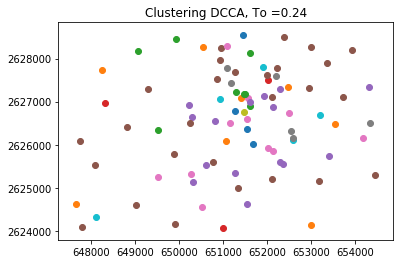

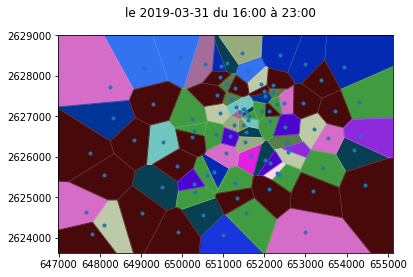

In [135]:
for i in range(len(r_wd)):
    r_wd[i].setTrafic(F4[i])
T=DCCA.peak_tracking(CBBU,F4,r_wd)  
W=DCCA.matriceComplementarite(r_wd,CBBU,To)
P,l=DCCA.iterative_DCCA (r_wd,F4,CBBU,max_iter,To,iter_converge)
coord,clusters,k=display_cluster(P)
print(k)
affichage_vor(clusters,coord,color, "le 2019-03-31 du 16:00 à 23:00")

In [136]:
h="16:00"
SMG_weekend[h]=(len(clusters)/(k*CBBU))
ecartpos=[]
ecartneg=[]
for c in P:
    if c!=[]:
        agg=DCCA.aggregationTrafic(c)
        ecart=CBBU-np.max(agg)
        if (ecart >=0):
            ecartpos.append(ecart)
        else:
            ecartneg.append(abs(ecart))
if(ecartpos != []):
    souscharge_weekend[h]=max(ecartpos)
    
else:
    souscharge_weekend[h]=0
if(ecartneg != []):
    surcharge_weekend[h]=max(ecartneg)
    utilite_max_weekend[h]=CBBU+max(ecartneg)
else:
    surcharge_weekend[h]=0
    utilite_max_weekend[h]=CBBU-min(ecartpos)

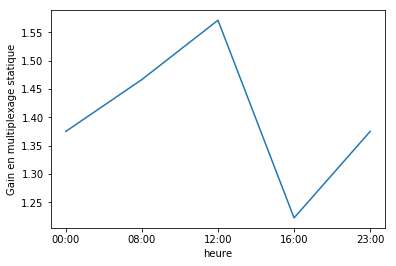

In [137]:
plt.plot(list(SMG_weekend.keys())+["23:00"],list(SMG_weekend.values())+[SMG_weekend["00:00"]])
plt.ylabel("Gain en multiplexage statique")
plt.xlabel("heure")
plt.show()

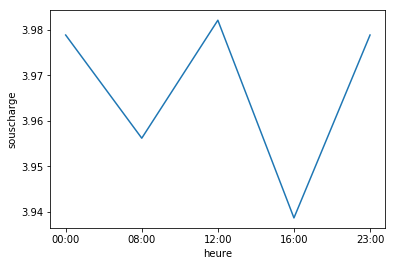

In [138]:
plt.plot(list(souscharge_weekend.keys())+["23:00"],list(souscharge_weekend.values())+[souscharge_weekend["00:00"]])
plt.ylabel("souscharge")
plt.xlabel("heure")
plt.show()

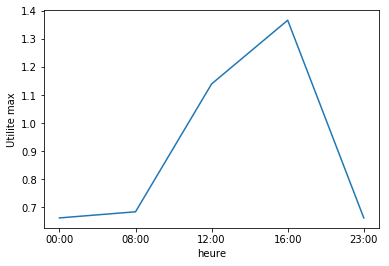

In [139]:
plt.plot(list(utilite_max_weekend.keys())+["23:00"],list(utilite_max_weekend.values())+[utilite_max_weekend["00:00"]])
plt.ylabel("Utilite max")
plt.xlabel("heure")
plt.show()

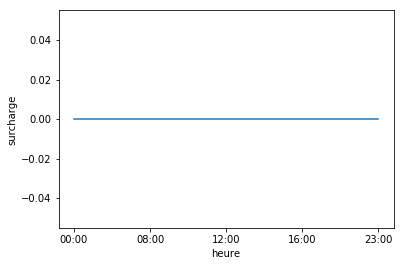

In [140]:
plt.plot(list(surcharge_weekend.keys())+["23:00"],list(surcharge_weekend.values())+[surcharge_weekend["00:00"]])
plt.ylabel("surcharge")
plt.xlabel("heure")
plt.show()

In [141]:
trafic_max2=trafic_max*0.5
trafic_min2=trafic_min*0.5
print(trafic_max1,trafic_min1)
print((np.max(F),np.max(F_wd)))
F_norm=DCCA.normalize_trafic(F,trafic_max2,trafic_min2)
F1=F_norm[:,0:8]
F2=F_norm[:,8:12]
F3=F_norm[:,12:16]
F4=F_norm[:,16:23]
print(np.shape(F1))

3261172247.425289 0.0
(4348229663.233719, 1648823168.9081848)
(88, 8)


## Tests 2 :

13


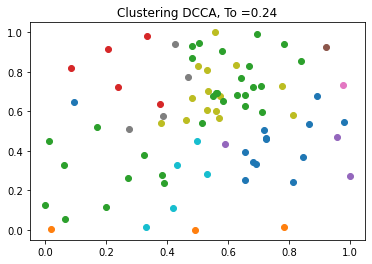

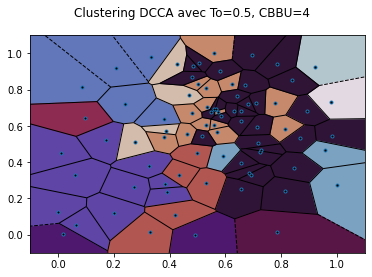

In [113]:
NBBU=2
CBBU=4
To=0.5
#P,l=apply_DCCA(F,r,To,CBBU)

T=DCCA.peak_tracking(CBBU,F_norm,r)  
W=DCCA.matriceComplementarite(r,CBBU,To)
P,l=DCCA.iterative_DCCA (r,F_norm,CBBU,max_iter,To,iter_converge)
coord,clusters,k=display_cluster(P)
print(k)
#color=colors(k)
affichage_vor(clusters,coord,color, "Clustering DCCA avec To=0.5, CBBU=4",0,12)

In [131]:
def util_cost(P,F):
    Uc=[]
    Cc=[]
    Us=[]
    Cs=[]
    for c in P:
        if c!=[]:
            agg=DCCA.aggregationTrafic(c)
            moy=sum(agg)/len(agg)
            mx=max(agg)
            Uc.append(moy/mx)
            Cc.append(mx)
    for l in F:
        moy=sum(l)/len(l)
        mx=max(l)
        Us.append(moy/mx)
        Cs.append(mx)
    U=(sum(Uc)/len(Uc))/(sum(Us)/len(Us))
    C=sum(Cc)/sum(Cs)
    return U,C
def get_max_largeur(P):
    dist=0
    for c in P:
        if c!=[]:
            for i in range(len(c)-1):
                x=c[i].lat
                y=c[i].lng
                for j in range(i+1,len(c)):
                    x2=c[j].lat
                    y2=c[j].lng
                    d=math.sqrt((x-x2)**2 + (y-y2)**2)
                    if (d > dist):
                        dist=d
    return dist

In [115]:
util_cost(P,F_norm)

(1.1156666104370432, 0.9312908304003559)

In [133]:
les_cost=[]
les_cost_max=[]
les_util=[]
les_util_max=[]
les_diam=[]
les_diam_max=[]
CBBU=3
for To in np.arange(0.1,3,0.1):
    c_run=[]
    u_run=[]
    d_run=[]
    for i in range(10):
        W=DCCA.matriceComplementarite(r,CBBU,To)
        P,l=DCCA.iterative_DCCA (r,F_norm,CBBU,max_iter,To,iter_converge)
        u,c=util_cost(P,F_norm)
        c_run.append(c)
        u_run.append(u)
        d_run.append(get_max_largeur(P))
    les_diam.append(sum(d_run)/len(d_run))
    les_diam_max.append(max(d_run))
    les_cost.append(sum(c_run)/len(c_run))
    les_util.append(sum(u_run)/len(u_run))
    les_cost_max.append(max(c_run))
    les_util_max.append(max(u_run))

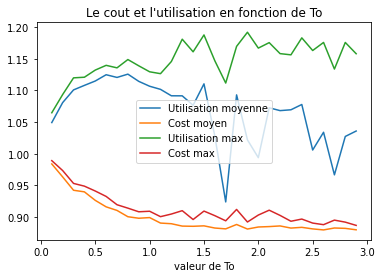

In [134]:
to=np.arange(0.1,3,0.1)
plt.plot(to,les_util,label='Utilisation moyenne')
plt.plot(to,les_cost,label='Cost moyen')
plt.plot(to,les_util_max,label='Utilisation max')
plt.plot(to,les_cost_max,label='Cost max')
plt.legend()
plt.xlabel("valeur de To")
plt.title("Le cout et l'utilisation en fonction de To")
plt.show()

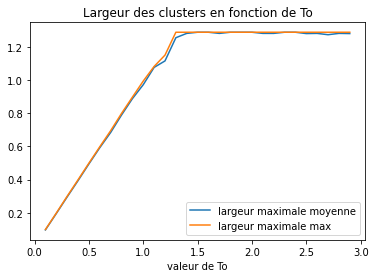

In [135]:
to=np.arange(0.1,3,0.1)
plt.plot(to,les_diam,label='largeur maximale moyenne')
plt.plot(to,les_diam_max,label='largeur maximale max')
plt.legend()
plt.xlabel("valeur de To")
plt.title("Largeur des clusters en fonction de To")
plt.show()